# Decision Trees
#### Math 3480 - Machine Learning - Dr. Michael E. Olson

## Reading
* Geron, Chapter 6
* Brunton, Section 5.8 [Video](https://www.youtube.com/watch?v=fsE9gzbf8Z4)
* James, Chapter 8

## Uses
* Classification
* Regression

## How it works
Look at each variable in the data. 
* For categorical data, you can separate (or branch) the data into the categories for a variable
* For numerical data, you can create a boundary, and classify the data by whether it is greater than or less than that boundary

Parts of a decision tree
* Node: Split the value of a certain attribute (the variable being tested for a split)
* Edge: Possible outcomes of each node that leads to the next node
* Root: The first node
* Leaves: The final nodes that predict the outcome

## Example
Take the Iris dataset, and create a model to separate the data by category.

We have four primary variables:
* $x_1$: sepal length
* $x_2$: sepal width
* $x_3$: petal length
* $x_4$: petal width

Here is a plot of the data:

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

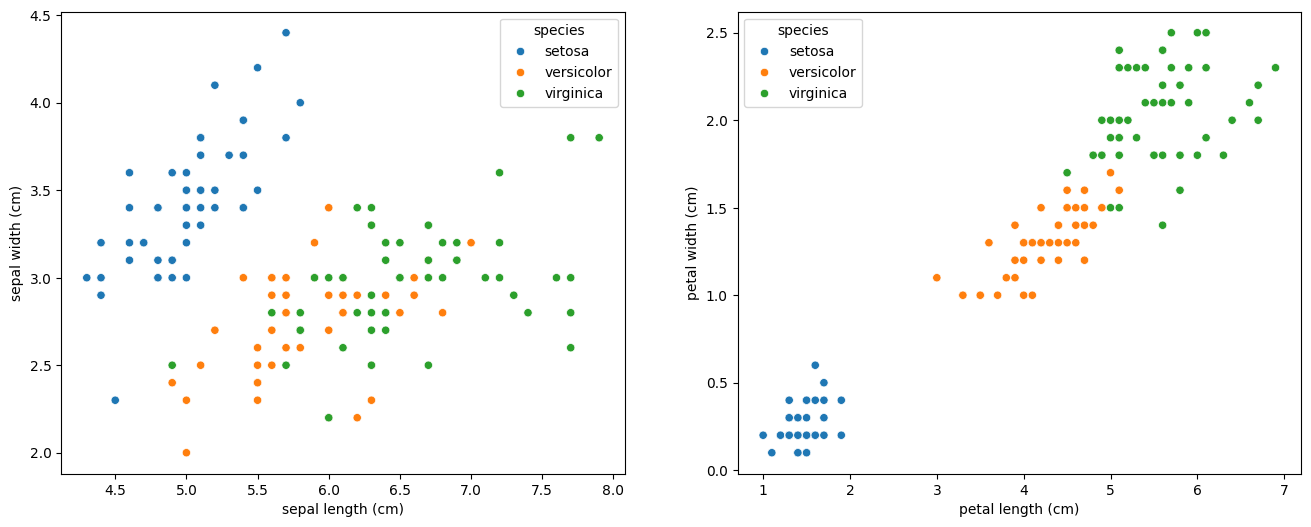

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 6)
from sklearn import datasets

iris_data = datasets.load_iris()
iris = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
species = pd.DataFrame(iris_data['target'], columns=['species_num'])

target_names = {
    0 : 'setosa',
    1 : 'versicolor',
    2 : 'virginica'
}

iris['species'] = species['species_num'].apply(lambda x: target_names[x])

fig, ax = plt.subplots(1,2)
sns.scatterplot(data = iris, x = 'petal length (cm)', y = 'petal width (cm)', hue='species', ax=ax[1])
sns.scatterplot(data = iris, x = 'sepal length (cm)', y = 'sepal width (cm)', hue='species', ax=ax[0])
#fig.show()

Now, we find the best separation for our first branch. 
* Looking at the sepal width and length, there is no clear vertical line ($x_1$) or horizontal line ($x_2$) that can separate the data. 
* Looking at the petal width and length, there is a very clear separation in the petal length at $x_3=2.5$. 
  * There is also a clear separation in the petal width at $x_4 = 0.75$. 
  * The separation in $x_3$ is wider, so we'll use that as our first classification.

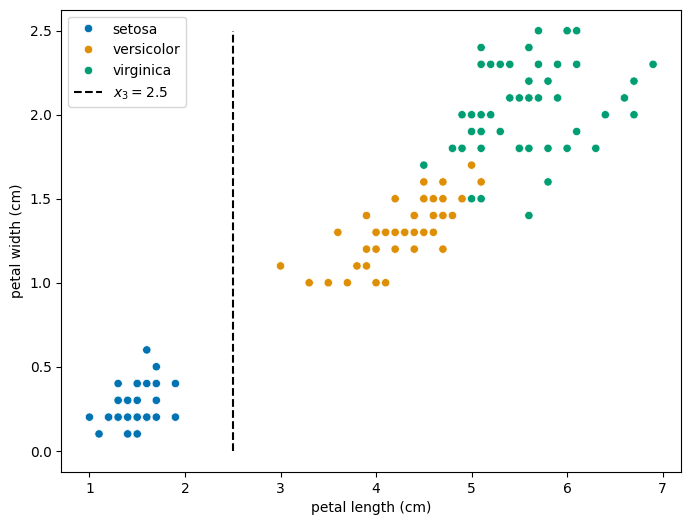

In [2]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.scatterplot(data = iris, x = 'petal length (cm)', y = 'petal width (cm)', hue='species', palette='colorblind')
plt.plot((2.5,2.5),(0,2.5), color='k', linestyle='--', label='$x_3=2.5$')
plt.legend()

Our second branch will be to separate the Versicolor and Virginica species. The best separation would be a horizontal line around $x_4 = 1.75$.

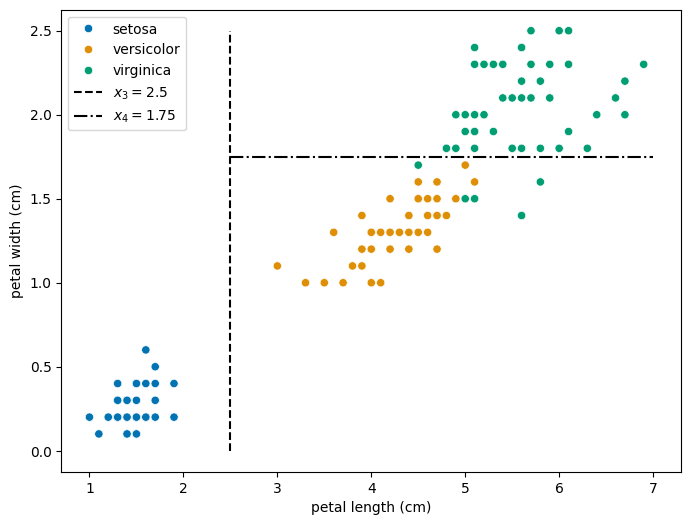

In [3]:
sns.scatterplot(data = iris, x = 'petal length (cm)', y = 'petal width (cm)', hue='species', palette='colorblind')
plt.plot((2.5,2.5),(0,2.5), color='k', linestyle='--', label='$x_3=2.5$')
plt.plot((2.5,7),(1.75,1.75), color='k', linestyle='-.', label='$x_4=1.75$')
plt.legend()

But this wasn't a perfect separation. There are some Virginica results in the Versicolor region.
* Create another separation to best separate the data around $x_3 = 4.95$.

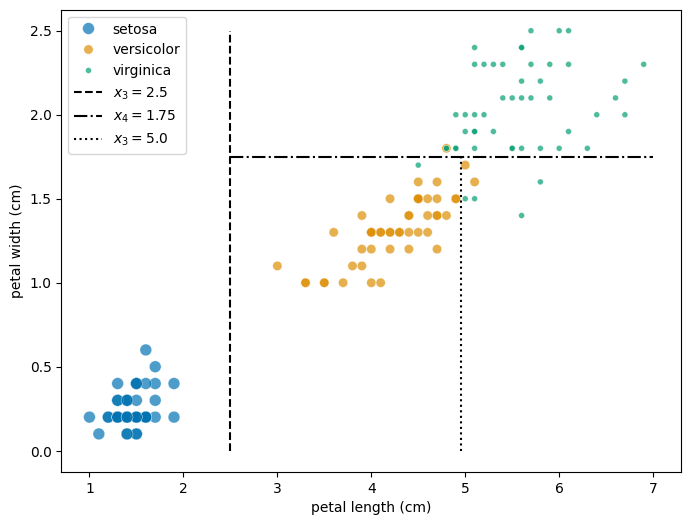

In [4]:
sns.scatterplot(data = iris, x = 'petal length (cm)', y = 'petal width (cm)',
                size='species', hue='species',
                palette='colorblind',
                alpha=0.7)
plt.plot((2.5,2.5),(0,2.5), color='k', linestyle='--', label='$x_3=2.5$')
plt.plot((2.5,7),(1.75,1.75), color='k', linestyle='-.', label='$x_4=1.75$')
plt.plot((4.95,4.95),(0,1.75), color='k', linestyle=':', label='$x_3=5.0$')
plt.legend()

Even though this isn't perfect, we really only have 3 misclassifications. This creates a pretty good model for the iris flowers.

So, the decision tree would look something like this:

<!--[![](https://mermaid.ink/img/pako:eNpdkMFqwkAQhl9lmLMGlIo0B0FN7EWkVLCUbA5DdposTXZlszmUJO_ejY0QndPA_83HzLSYGckYYm7pWsDxQ2jwtW3f2VEJR9a5K2ADy2DVjxHM5xvovrjuYDdin0reqEWwfsJOpoN9cmZnakr_k91EECcXZXOlVUYpPMTDYPS8xUvwevdHE8thYnlIB8lbcmFbq8yUxqY4w4ptRUr6k9uBFegKrlhg6FtJ9keg0L3nmqskx7FUzlgMv6mseYbUOHP-1RmGzjZ8hyJF_n3VSPV_HExqUw)](https://mermaid-js.github.io/mermaid-live-editor/edit#pako:eNpdkMFqwkAQhl9lmLMGlIo0B0FN7EWkVLCUbA5DdposTXZlszmUJO_ejY0QndPA_83HzLSYGckYYm7pWsDxQ2jwtW3f2VEJR9a5K2ADy2DVjxHM5xvovrjuYDdin0reqEWwfsJOpoN9cmZnakr_k91EECcXZXOlVUYpPMTDYPS8xUvwevdHE8thYnlIB8lbcmFbq8yUxqY4w4ptRUr6k9uBFegKrlhg6FtJ9keg0L3nmqskx7FUzlgMv6mseYbUOHP-1RmGzjZ8hyJF_n3VSPV_HExqUw)-->
![Decision Tree](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0601.png)

## Where do we make the split?
How do we know which split to look at first?
* Gini Index
* Entropy
* Information Gain

### Gini Index
To calculate the Gini index, take each node ($i$) and the number classified in that node ($n_i$). Then count the number of instances ($n_k$) in each category $k$. The ratio of the number of each classification to the number of elements in that node is $p_{i,k} = \frac{n_k}{n_i}$ The Gini index is calculated as,
$$G_i = 1 - \sum_{k=0}^n p_{i,k}^2 \qquad \qquad p_{i,k} = \frac{n_k}{n_i}$$

If a categorization is "pure", then all items are put into one category, and we get a Gini index of 0.0. For this reason, the Gini index is also often referred to as the __Gini impurity__.

Look at the first split (is $Petal~Length>2.5$?). If the answer to the first split is "No", then we have a pure categorization. 
* 50 flowers have a petal length less than 2.5
* All 50 are setosa.

In [5]:
iris[iris['petal length (cm)'] < 2.5]['species'].value_counts()

species
setosa    50
Name: count, dtype: int64

$$G_1 = 1 - \sum_{k=0}^2 p_{i,k}^2 = 1 - \left(\frac{50}{50}\right)^2 - \left(\frac{0}{50}\right)^2 - \left(\frac{0}{50}\right)^2 = 1-1-0-0 = 0.0$$

In [6]:
def gini(x):
    result = 1
    for a in x:
        result = result - (a/sum(x))**2
    return result

gini([50,0,0])

0.0

What is the Gini impurity if we look at the flowers with $Petal~Length>2.5$?

In [7]:
iris[iris['petal length (cm)'] > 2.5]['species'].value_counts()

species
versicolor    50
virginica     50
Name: count, dtype: int64

$$G_1 = 1 - \sum_{k=0}^2 p_{i,k}^2 = 1 - \left(\frac{0}{100}\right)^2 - \left(\frac{50}{100}\right)^2 - \left(\frac{50}{100}\right)^2$$

In [8]:
gini([0,50,50])

0.5

This is pretty high. Let's take the second split and see if we can decrease the Gini impurity. How many points have $Petal~Width<1.75$ (below the second split)?

In [9]:
iris[(iris['petal width (cm)'] < 1.75) & (iris['petal length (cm)'] > 2.5)]['species'].value_counts()

species
versicolor    49
virginica      5
Name: count, dtype: int64

$$G_1 = 1 - \sum_{k=0}^2 p_{i,k}^2 = 1 - \left(\frac{0}{54}\right)^2 - \left(\frac{49}{54}\right)^2 - \left(\frac{5}{54}\right)^2$$

In [10]:
gini([0,49,5])

0.1680384087791495

How many points have $Petal~Width>1.75$ (above the second split)?
* 46 flowers have a petal width greater than 1.75
* 1 is versicolor
* 45 are virginica


In [11]:
iris[(iris['petal width (cm)'] > 1.75) & (iris['petal length (cm)'] > 2.5)]['species'].value_counts()

species
virginica     45
versicolor     1
Name: count, dtype: int64

$$G_1 = 1 - \sum_{k=0}^2 p_{i,k}^2 = 1 - \left(\frac{0}{46}\right)^2 - \left(\frac{1}{46}\right)^2 - \left(\frac{45}{46}\right)^2$$

In [12]:
gini([0,1,45])

0.04253308128544431

The computer tries different splits and finds the lowest Gini impurity.

To calculate the best split, `scikit-learn` uses the *CART* algorithm (Classification And Regression Tree), which only produces two branches from each node. Other algorithms such as *ID3* can produce more algorithms. The cost function for the *CART* algorithm is:
$$J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$$

where $m_{left/right}$ is the number of instances in the left/right subset and $G_{left/right}$ is the Gini impurity of the left/right subset.

Unfortunately, the *CART* algorithm can be rather greedy. The number of calculations is $\mathcal{O}(exp(m))$. On the other hand, the decision tree itself only takes $\mathcal{O}(\log_2(m))$ calculations and is independent of the number of features checked. So, another option is a check that is on that same order, such as *entropy*.

### Entropy
Applying the entropy to the decision tree,
$$H_i = -\sum_{k=1}^n p_{i,k} \log_2(p_{i,k})$$

Calculate the entropy below the second split.

In [13]:
import numpy as np
H = -(49/54)*np.log2(49/54) - (5/54)*np.log2(5/54)
H

0.44506485705083865

As before, the computer tries different splits and finds the lowest entropy.

Which method is better at finding best split? In most cases, it won't really matter.
* Gini is faster to compute
* When there is a difference, Gini tends to isolate the most frequent class in its own branch of the tree
* When there is a difference, Entropy tends to produce slightly more balanced trees

### Decision Trees from *sklearn*

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

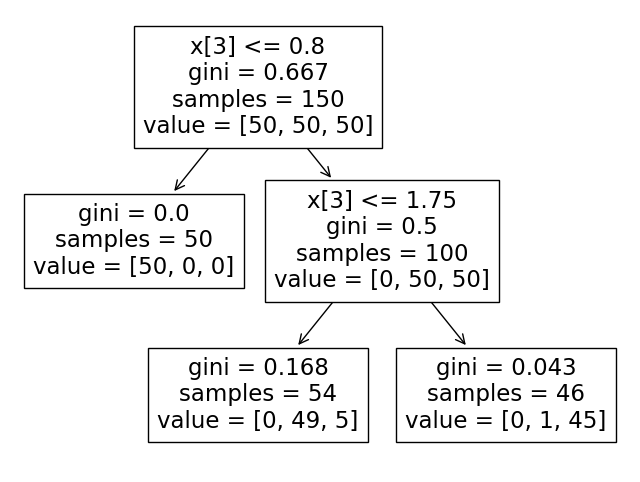

In [14]:
from sklearn import tree

## Using the Gini Index as measure of model performance

clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf = clf.fit(iris_data.data, iris_data.target)
tree.plot_tree(clf, max_depth=2)

[Text(0.375, 0.875, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.375, 'x[2] <= 4.85\nentropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.125, '\n  (...)  \n')]

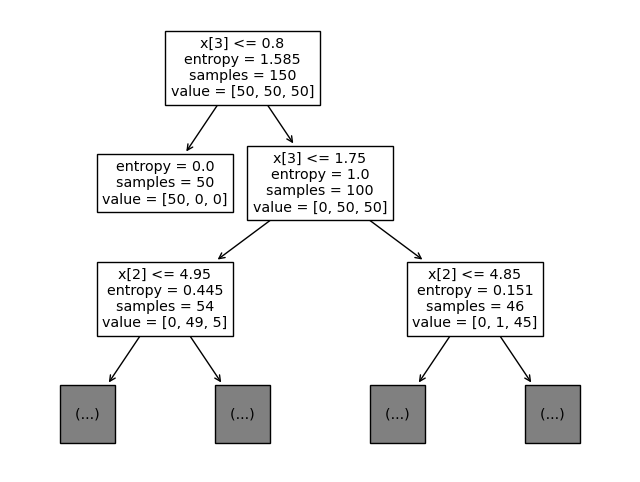

In [15]:
## Using Entropy as measure of model performance

clf = tree.DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=3) # Default criterion is gini
clf = clf.fit(iris_data.data, iris_data.target)
tree.plot_tree(clf, max_depth=2)

[Text(0.375, 0.875, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'entropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\nentropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

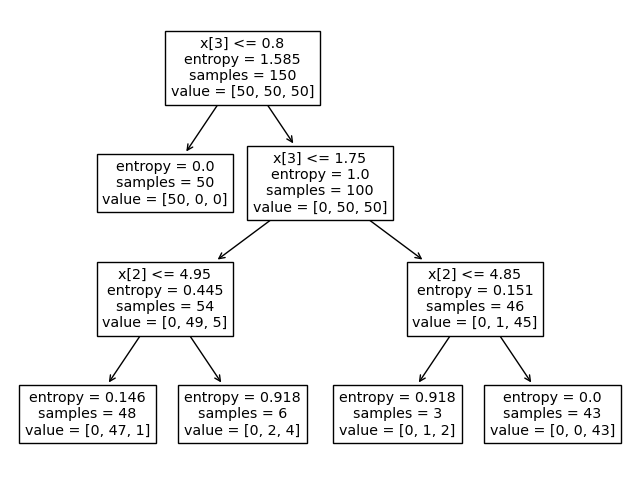

In [16]:
tree.plot_tree(clf, max_depth=3)

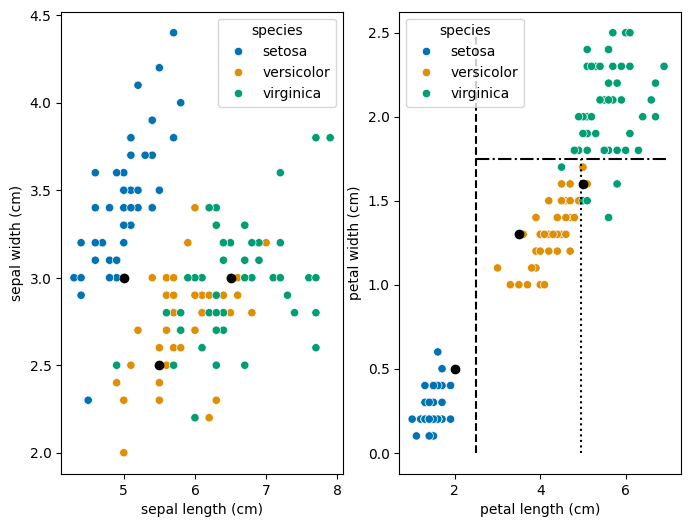

In [20]:
# Prediction
import numpy as np
X_test = np.array([[5.5, 2.5, 3.5, 1.3],
                   [5.0, 3.0, 2.0, 0.5],
                   [6.5, 3.0, 5.0, 1.6]])

fig, ax = plt.subplots(1,2)
sns.scatterplot(data = iris, x = 'petal length (cm)', y = 'petal width (cm)', hue='species', ax=ax[1], palette='colorblind')
sns.scatterplot(data = iris, x = 'sepal length (cm)', y = 'sepal width (cm)', hue='species', ax=ax[0], palette='colorblind')
ax[0].scatter(X_test[:,0],X_test[:,1], c='black')
ax[1].scatter(X_test[:,2],X_test[:,3], c='black')
ax[1].plot((2.5,2.5),(0,2.5), color='k', linestyle='--', label='$x_3=2.5$')
ax[1].plot((2.5,7),(1.75,1.75), color='k', linestyle='-.', label='$x_4=1.75$')
ax[1].plot((4.95,4.95),(0,1.75), color='k', linestyle=':', label='$x_3=5.0$')

In [22]:
y_pred = clf.predict(X_test)
print(target_names)
print(y_pred)

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}
[1 0 2]


## Decision Tree Regression
Decision Trees are generally used as a classifier.
* [Machine Learning Landscape](https://raw.githubusercontent.com/drolsonmi/math3480/main/Notes/Images/3480_05_ML_Landscape.png)
  
However, decision trees can also be used for regression. The biggest difference is that the decision tree returns a value instead of a category. The accuracy of the regression depends on the __depth__, or number of branches you want to make.
* Find an x value that separates the data into two groups 
  * Find the best value to minimize the error (MSE, etc.)
  * Return the mean of the y values in each group
* Find two more x values that separate each of the two groups into two smaller groups
* Keep going as many steps as you want, specifying the depth

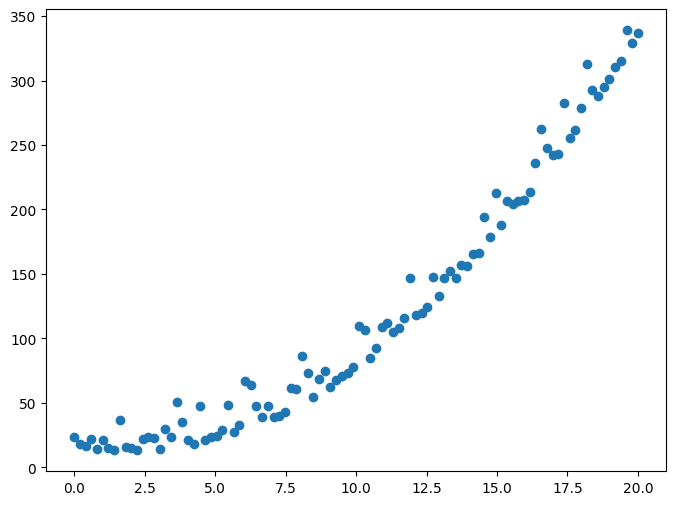

In [23]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0,20,100)
y = X**2 - 4*X + 15.3 + 40**np.random.random(len(X))

plt.scatter(X,y)

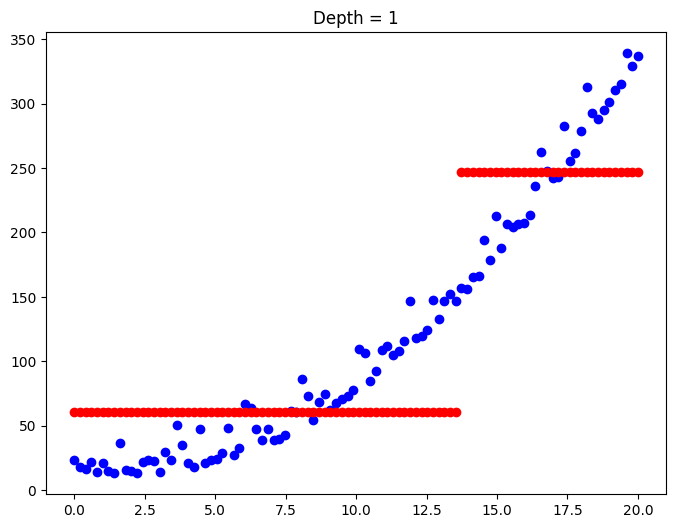

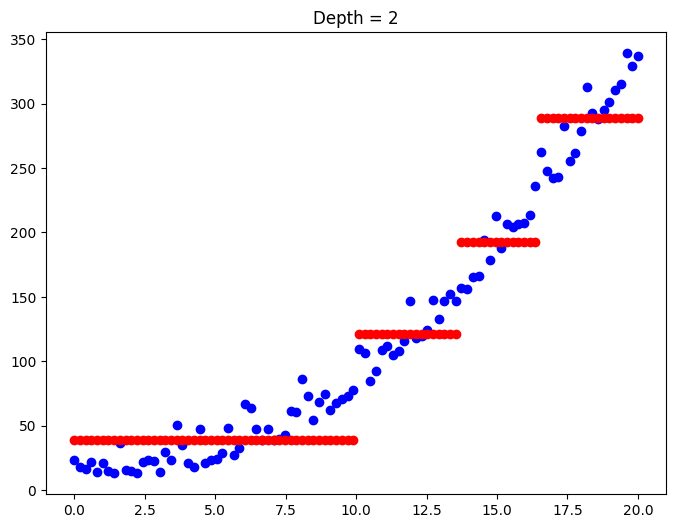

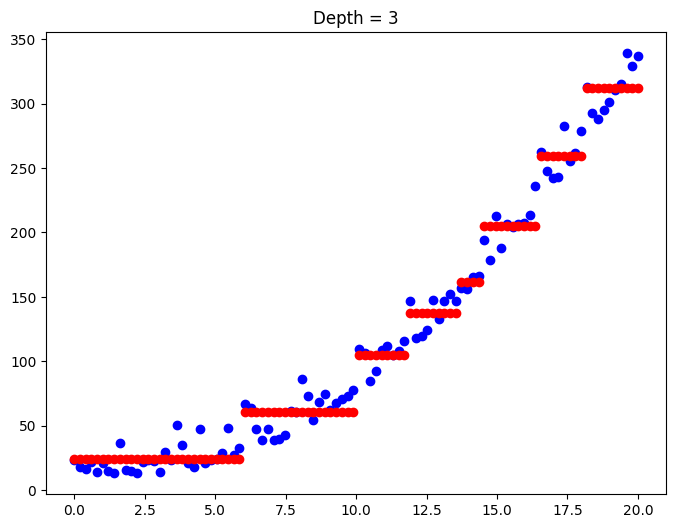

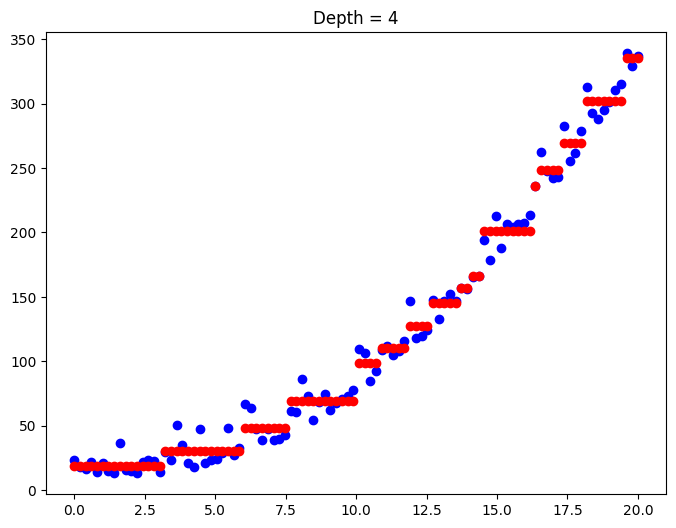

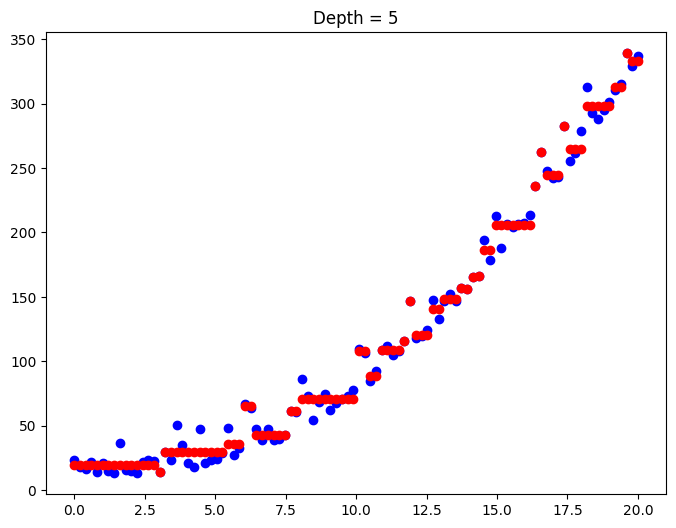

In [24]:
from sklearn.tree import DecisionTreeRegressor

XT = np.transpose([X])

for i in range(5):
    plt.figure()
    tree_reg = DecisionTreeRegressor(max_depth=i+1)
    tree_reg.fit(XT,y)
    y_predict = tree_reg.predict(XT)
    plt.scatter(X,y,color='b',label='original')
    plt.scatter(X,y_predict, color='r')
    plt.title('Depth = {0}'.format(i+1))

Notice how with $Depth=5$, the regression points start to __overfit__ the data. To fix this, we can use the ```min_samples_leaf``` option. From the documentation:
> The minimum number of samples required to be at a leaf node.
    *A split point at any depth will only be considered if it leaves at
    least ```min_samples_leaf``` training samples in each of the left and
    right branches.*  This may have the effect of smoothing the model,
    especially in regression.


Text(0.5, 1.0, 'Depth = 5')

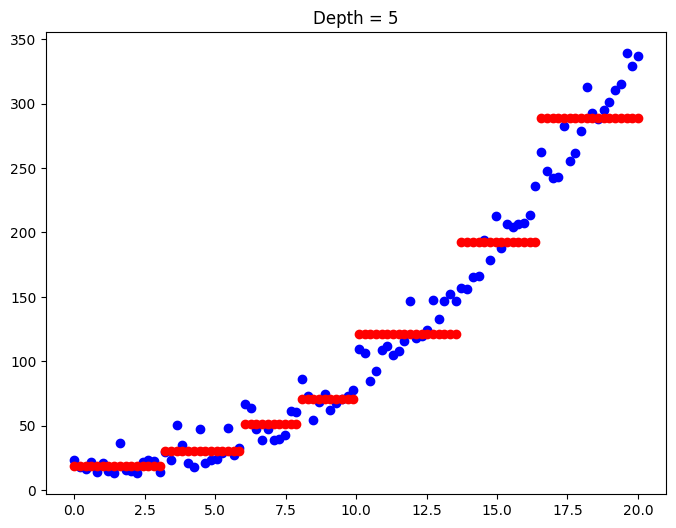

In [29]:
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10)
tree_reg.fit(XT,y)
y_predict = tree_reg.predict(XT)
plt.scatter(X,y,color='b',label='original')
plt.scatter(X,y_predict, color='r')
plt.title('Depth = 5')